In [31]:
import os
import pandas as pd
import numpy as np
import sys
import os

def find_and_append_module_path():
    current_dir = os.getcwd()
    substring_to_find = 'statsfaction'
    index = current_dir.rfind(substring_to_find)
    
    if index != -1:
        # Extract the directory path up to and including the last "mypath" occurrence
        new_dir = current_dir[:index + (len(substring_to_find))]

        # Change the current working directory to the new directory
        os.chdir(new_dir)
        sys.path.append(new_dir)
        # Verify the new current directory
        print("New current directory:", os.getcwd())
    else:
        print("No 'mypath' found in the current directory")

find_and_append_module_path()
os.getcwd()


New current directory: c:\Users\Robert\Documents\Projekte\dev\statsfaction


'c:\\Users\\Robert\\Documents\\Projekte\\dev\\statsfaction'

In [32]:
from src.sport_analytics.model.predict import predict_and_explain_players, analyze_individual_ID


# Import your group to analyze

In [33]:
sql_prospect = f"""
SELECT min(Age) as potential_age,* FROM  fifa WHERE Potential>84 AND FIFA = 2024 and Age < 23 and potential > 83 and overall <84
GROUP BY ID
order by potential DESC;
"""

import pandas as pd
import sqlite3
DATABASE_PATH = "data/sport_analytics/database/football.db"
# Step 1: Establish a database connection
conn = sqlite3.connect(DATABASE_PATH)

df_prospect = pd.read_sql_query(sql_prospect, conn)

conn.close()

df_prospect.head()

,potential_age,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,FIFA,Composure,Defensive awareness
0,19.0,263578,Balde,19.0,https://cdn.sofifa.net/players/263/578/24_60.png,Spain,https://cdn.sofifa.net/flags/es.png,81.0,89.0,FC Barcelona,...,80.0,79.0,5.0,8.0,7.0,10.0,13.0,2024,64.0,72.0
1,20.0,259399,R. Højlund,20.0,https://cdn.sofifa.net/players/259/399/24_60.png,Denmark,https://cdn.sofifa.net/flags/dk.png,76.0,89.0,Manchester United,...,24.0,15.0,12.0,8.0,9.0,14.0,7.0,2024,72.0,27.0
2,21.0,258729,Gabri Veiga,21.0,https://cdn.sofifa.net/players/258/729/24_60.png,Spain,https://cdn.sofifa.net/flags/es.png,78.0,89.0,Celta de Vigo,...,73.0,60.0,13.0,14.0,13.0,6.0,9.0,2024,68.0,41.0
3,20.0,248243,E. Camavinga,20.0,https://cdn.sofifa.net/players/248/243/24_60.png,France,https://cdn.sofifa.net/flags/fr.png,82.0,89.0,Real Madrid,...,80.0,79.0,12.0,6.0,8.0,12.0,12.0,2024,82.0,75.0
4,20.0,245367,X. Simons,20.0,https://cdn.sofifa.net/players/245/367/24_60.png,Netherlands,https://cdn.sofifa.net/flags/nl.png,79.0,89.0,RB Leipzig,...,62.0,56.0,9.0,11.0,5.0,8.0,10.0,2024,78.0,60.0


In [34]:
pd.Series(df_prospect.Overall/(df_prospect.Age**2)).describe()

count    93.000000
mean      0.192013
std       0.023734
min       0.152893
25%       0.170068
50%       0.192500
75%       0.207756
max       0.256055
dtype: float64

## Choose a from a Set of trained models

In [35]:
import pickle

with open("./data/sport_analytics/model/Offense_trained_models.pkl", "rb") as file:
    loaded_object = pickle.load(file)

In [36]:
[i for i in loaded_object]

['Decision Tree Classifier',
 'Random Forest Classifier',
 'XGBoost Classifier general',
 'XGBoost Classifier']

In [37]:
chosen_object = loaded_object['Random Forest Classifier']
model = chosen_object['Model']
scaler = chosen_object['Scaler']
attributes = chosen_object['attributes']

print(chosen_object['Classification Report'])
print(chosen_object['AUC'])

              precision    recall  f1-score   support

       False       0.88      0.75      0.81        51
        True       0.19      0.38      0.25         8

    accuracy                           0.69        59
   macro avg       0.54      0.56      0.53        59
weighted avg       0.79      0.69      0.73        59

0.7303921568627452


# Predict entire Dataset

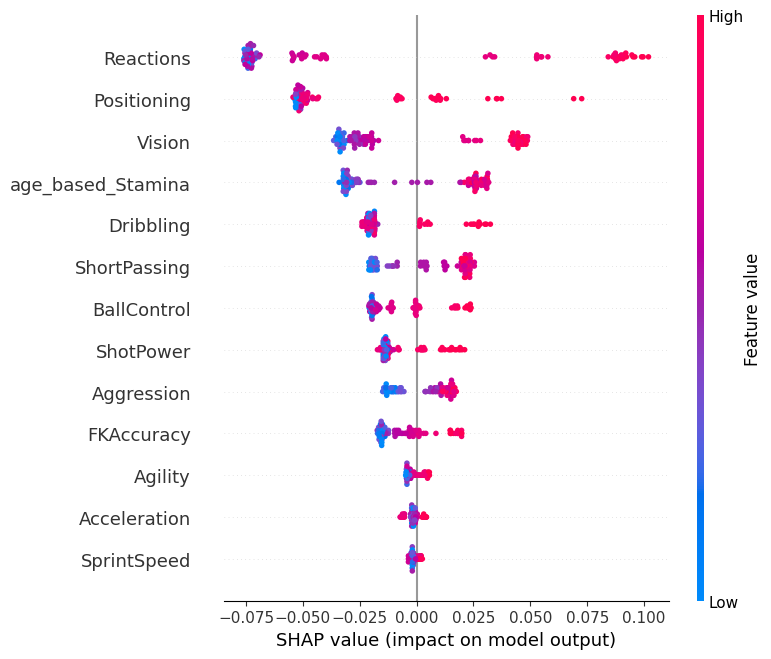

,,,Reactions,age_based_Stamina,Positioning,FKAccuracy,ShortPassing,Dribbling,BallControl,ShotPower,Aggression,Vision,Acceleration,SprintSpeed,Agility,summe_shap,prediction
ID,Name,FIFA,,,,,,,,,,,,,,,
236772,D. Szoboszlai,2024,1.614,0.340,2.152,1.786,0.877,2.146,2.088,2.186,-1.118,1.360,-0.278,1.630,-0.045,14.738,0.765855
245367,X. Simons,2024,1.446,0.880,-0.336,0.593,0.932,2.273,2.176,-0.259,0.496,1.315,2.258,1.358,1.385,14.517,0.684209
252145,Nuno Mendes,2024,1.561,0.962,1.444,0.218,0.835,-0.357,0.634,2.414,0.705,0.641,1.760,1.243,0.333,12.393,0.682089
251852,K. Adeyemi,2024,1.476,0.948,1.462,0.558,0.437,1.088,0.514,0.883,0.021,0.656,1.676,1.469,1.354,12.542,0.673393
246618,A. Hložek,2024,0.993,1.075,1.403,1.775,0.740,-0.357,0.565,2.343,0.686,1.260,0.107,-0.026,-0.320,10.244,0.671409
256903,Gonçalo Ramos,2024,1.603,0.999,3.394,-0.568,-0.146,-0.341,-0.168,2.515,1.084,-0.661,0.452,0.137,-0.263,8.037,0.661368
248805,Sergio Camello,2024,1.666,-0.804,2.348,0.247,0.921,-0.550,0.547,-0.077,-1.232,1.424,-0.158,-0.228,-0.514,3.590,0.632433
245541,G. Reyna,2024,1.488,-0.669,-0.472,0.589,0.975,2.653,0.620,1.640,-0.005,1.361,-0.593,-0.368,0.853,8.072,0.630460
248243,E. Camavinga,2024,1.504,0.947,-0.480,0.247,0.931,-0.375,2.166,-0.577,0.647,1.303,-0.383,-0.038,0.297,6.189,0.624320


In [38]:
preds = predict_and_explain_players(df_prospect,attributes=attributes,model=model,scaler=scaler)
preds.head(30)

# Analyze individual Players

In [39]:
df_prospect

,potential_age,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,FIFA,Composure,Defensive awareness
0,19.0,263578,Balde,19.0,https://cdn.sofifa.net/players/263/578/24_60.png,Spain,https://cdn.sofifa.net/flags/es.png,81.0,89.0,FC Barcelona,...,80.0,79.0,5.0,8.0,7.0,10.0,13.0,2024,64.0,72.0
1,20.0,259399,R. Højlund,20.0,https://cdn.sofifa.net/players/259/399/24_60.png,Denmark,https://cdn.sofifa.net/flags/dk.png,76.0,89.0,Manchester United,...,24.0,15.0,12.0,8.0,9.0,14.0,7.0,2024,72.0,27.0
2,21.0,258729,Gabri Veiga,21.0,https://cdn.sofifa.net/players/258/729/24_60.png,Spain,https://cdn.sofifa.net/flags/es.png,78.0,89.0,Celta de Vigo,...,73.0,60.0,13.0,14.0,13.0,6.0,9.0,2024,68.0,41.0
3,20.0,248243,E. Camavinga,20.0,https://cdn.sofifa.net/players/248/243/24_60.png,France,https://cdn.sofifa.net/flags/fr.png,82.0,89.0,Real Madrid,...,80.0,79.0,12.0,6.0,8.0,12.0,12.0,2024,82.0,75.0
4,20.0,245367,X. Simons,20.0,https://cdn.sofifa.net/players/245/367/24_60.png,Netherlands,https://cdn.sofifa.net/flags/nl.png,79.0,89.0,RB Leipzig,...,62.0,56.0,9.0,11.0,5.0,8.0,10.0,2024,78.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,21.0,242879,M. Vandevoordt,21.0,https://cdn.sofifa.net/players/242/879/24_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,75.0,85.0,Genk,...,10.0,18.0,77.0,74.0,73.0,73.0,76.0,2024,52.0,11.0
89,22.0,242578,B. Badiashile,22.0,https://cdn.sofifa.net/players/242/578/24_60.png,France,https://cdn.sofifa.net/flags/fr.png,78.0,85.0,Chelsea,...,80.0,76.0,8.0,7.0,5.0,15.0,8.0,2024,75.0,79.0
90,22.0,241736,Y. Bisseck,22.0,https://cdn.sofifa.net/players/241/736/24_60.png,Germany,https://cdn.sofifa.net/flags/de.png,74.0,85.0,Inter,...,75.0,70.0,8.0,7.0,8.0,5.0,11.0,2024,72.0,72.0
91,22.0,241187,L. Geertruida,22.0,https://cdn.sofifa.net/players/241/187/24_60.png,Netherlands,https://cdn.sofifa.net/flags/nl.png,79.0,85.0,Feyenoord,...,81.0,80.0,12.0,11.0,13.0,12.0,10.0,2024,77.0,76.0


pred 0.5787262784327909
[(240833, 'Y. Moukoko', 2024)]


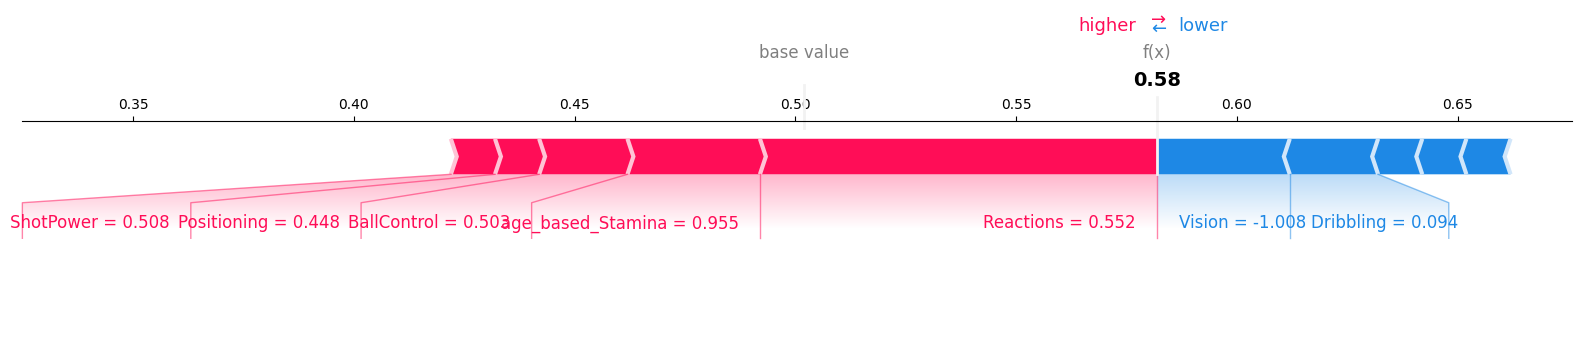

                  (240833, Y. Moukoko, 2024)  shap
Reactions                               77.0  0.09
age_based_Stamina                   7.727273  0.03
Positioning                             78.0  0.01
FKAccuracy                              42.0 -0.01
ShortPassing                            71.0 -0.01
Dribbling                               79.0 -0.02
BallControl                             81.0  0.02
ShotPower                               78.0  0.01
Aggression                              52.0 -0.01
Vision                                  59.0 -0.03
Acceleration                            82.0 -0.00
SprintSpeed                             79.0 -0.00
Agility                                 85.0  0.00
------------------------------------------------------------------------------------------------------------------------------------------------------
#######################################################################################################################################

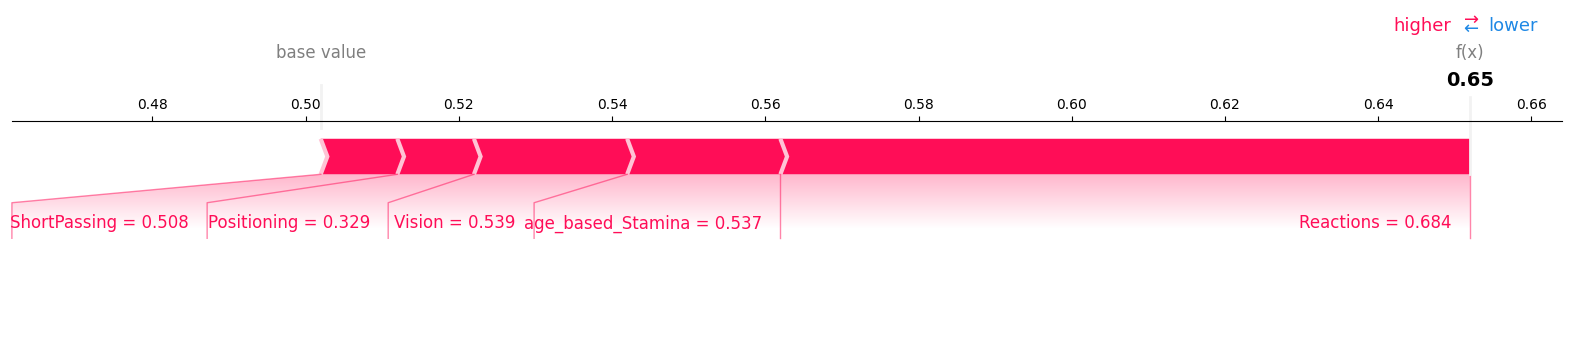

                  (251852, K. Adeyemi, 2024)  shap
Reactions                               78.0  0.09
age_based_Stamina                   4.538462  0.02
Positioning                             77.0  0.01
FKAccuracy                              62.0 -0.00
ShortPassing                            74.0  0.01
Dribbling                               82.0  0.00
BallControl                             79.0 -0.00
ShotPower                               76.0  0.00
Aggression                              59.0  0.00
Vision                                  72.0  0.02
Acceleration                            96.0  0.00
SprintSpeed                             96.0  0.00
Agility                                 88.0  0.00
------------------------------------------------------------------------------------------------------------------------------------------------------
#######################################################################################################################################

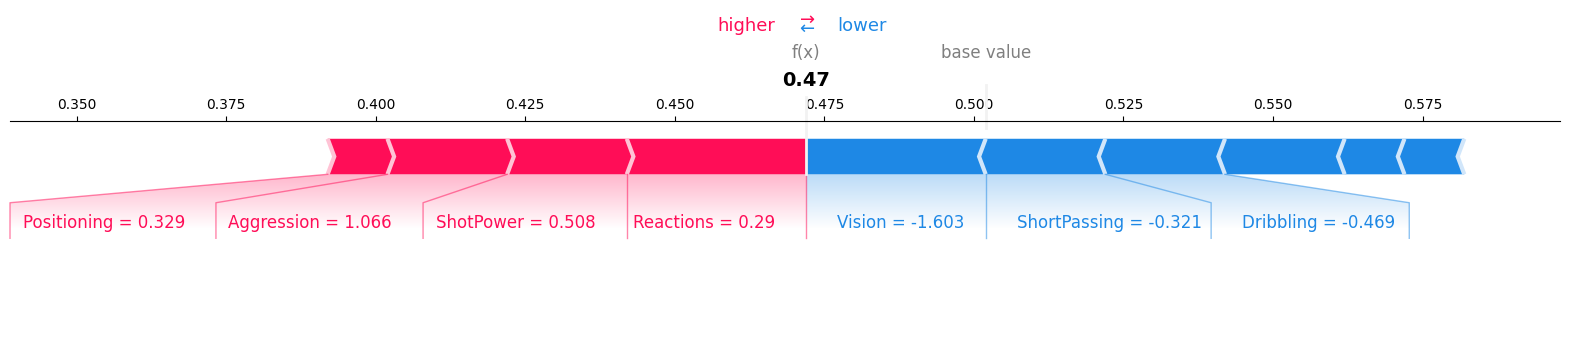

                  (259399, R. Højlund, 2024)  shap
Reactions                               75.0  0.03
age_based_Stamina                   0.545455  0.00
Positioning                             77.0  0.01
FKAccuracy                              48.0 -0.01
ShortPassing                            68.0 -0.02
Dribbling                               75.0 -0.02
BallControl                             76.0 -0.02
ShotPower                               78.0  0.02
Aggression                              69.0  0.02
Vision                                  54.0 -0.03
Acceleration                            84.0 -0.01
SprintSpeed                             85.0  0.00
Agility                                 69.0 -0.00
------------------------------------------------------------------------------------------------------------------------------------------------------
#######################################################################################################################################

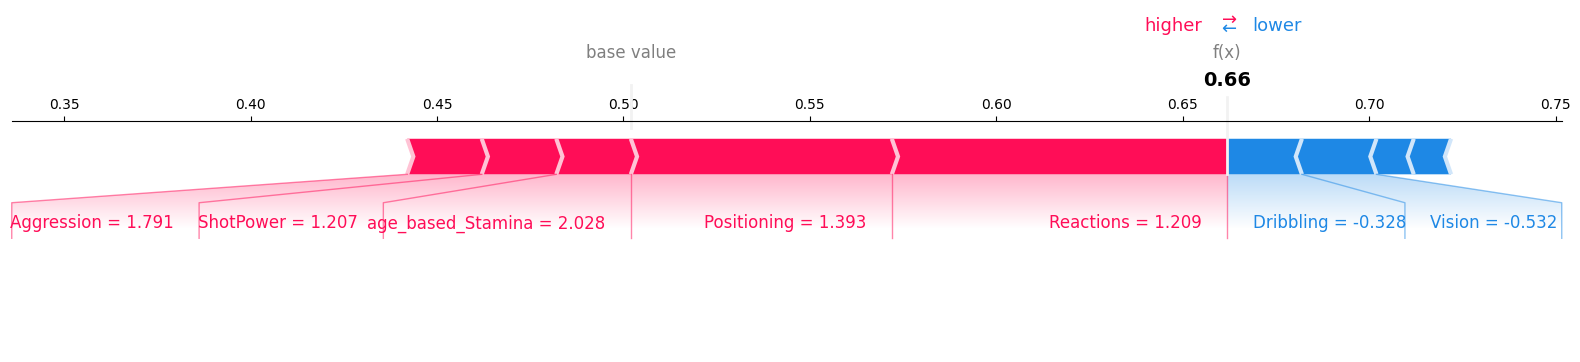

                  (256903, Gonçalo Ramos, 2024)  shap
Reactions                                  82.0  0.09
age_based_Stamina                     15.904762  0.02
Positioning                                86.0  0.07
FKAccuracy                                 45.0 -0.01
ShortPassing                               73.0  0.00
Dribbling                                  76.0 -0.02
BallControl                                78.0 -0.01
ShotPower                                  83.0  0.02
Aggression                                 80.0  0.02
Vision                                     63.0 -0.02
Acceleration                               78.0 -0.00
SprintSpeed                                77.0 -0.00
Agility                                    78.0 -0.00
------------------------------------------------------------------------------------------------------------------------------------------------------
#############################################################################################

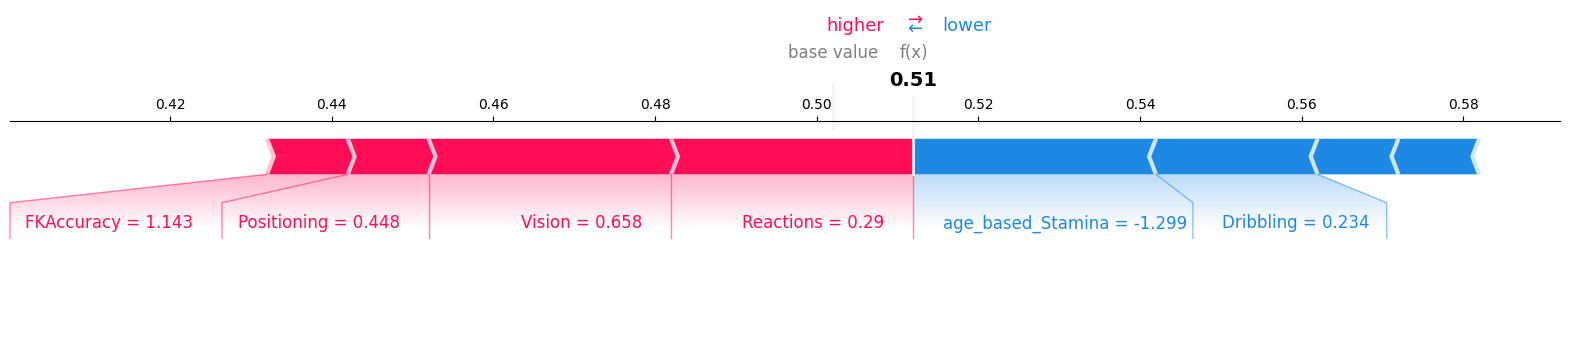

                  (253004, Ansu Fati, 2024)  shap
Reactions                              75.0  0.03
age_based_Stamina                 -9.454545 -0.03
Positioning                            78.0  0.01
FKAccuracy                             73.0  0.01
ShortPassing                           73.0  0.00
Dribbling                              80.0 -0.02
BallControl                            79.0 -0.00
ShotPower                              74.0 -0.01
Aggression                             48.0 -0.01
Vision                                 73.0  0.03
Acceleration                           91.0  0.00
SprintSpeed                            87.0  0.00
Agility                                89.0  0.00
------------------------------------------------------------------------------------------------------------------------------------------------------
#####################################################################################################################################################

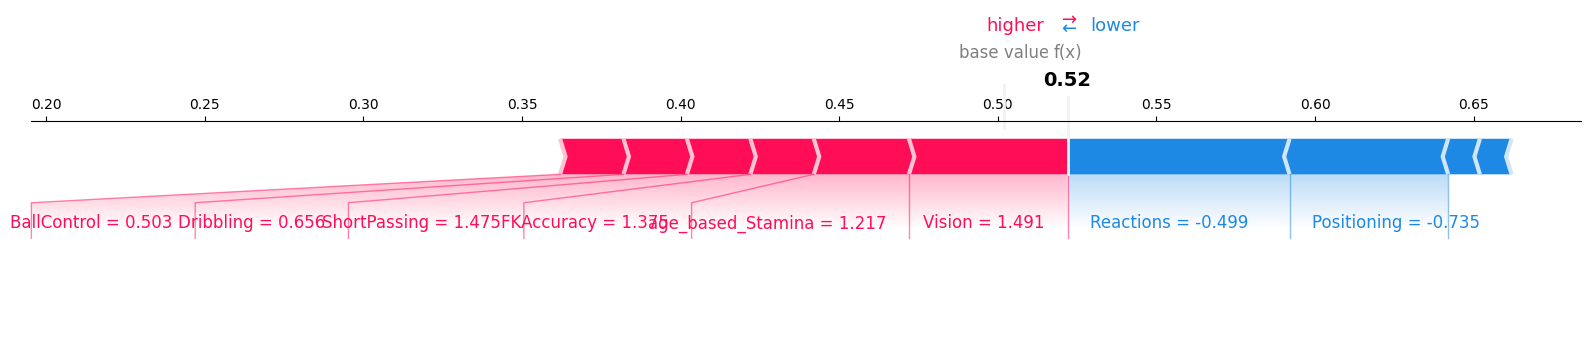

                  (264309, A. Güler, 2024)  shap
Reactions                             69.0 -0.07
age_based_Stamina                 9.727273  0.03
Positioning                           68.0 -0.05
FKAccuracy                            76.0  0.02
ShortPassing                          81.0  0.02
Dribbling                             83.0  0.02
BallControl                           81.0  0.02
ShotPower                             72.0 -0.01
Aggression                            42.0 -0.01
Vision                                80.0  0.05
Acceleration                          75.0 -0.00
SprintSpeed                           69.0 -0.00
Agility                               82.0  0.00
------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################
pred 0.54069

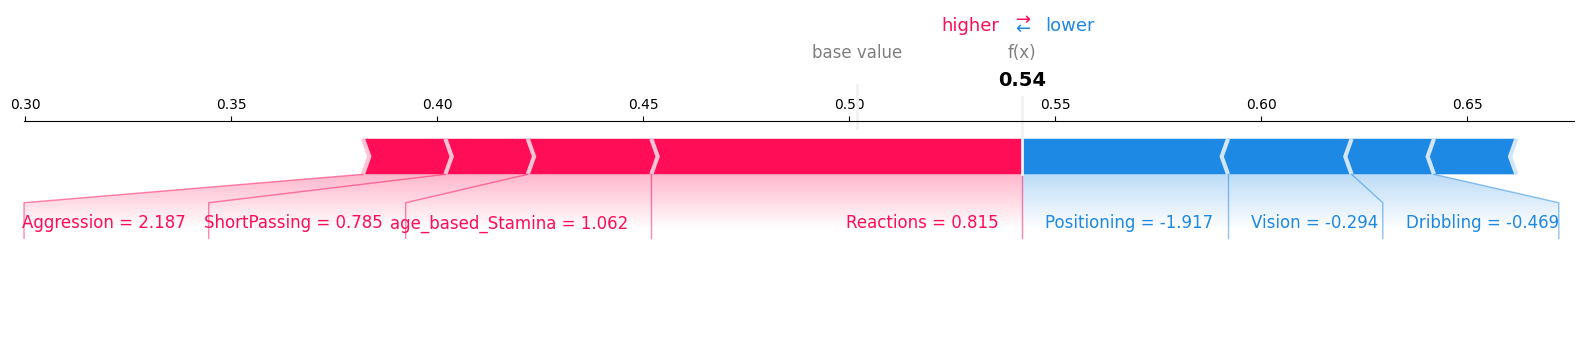

                  (251517, J. Gvardiol, 2024)  shap
Reactions                                79.0  0.09
age_based_Stamina                    8.538462  0.03
Positioning                              58.0 -0.05
FKAccuracy                               59.0 -0.00
ShortPassing                             76.0  0.02
Dribbling                                75.0 -0.02
BallControl                              76.0 -0.02
ShotPower                                76.0  0.00
Aggression                               86.0  0.02
Vision                                   65.0 -0.03
Acceleration                             80.0 -0.00
SprintSpeed                              76.0 -0.00
Agility                                  68.0 -0.00
------------------------------------------------------------------------------------------------------------------------------------------------------
#########################################################################################################################

In [40]:
for ID in [240833,251852,259399,256903,253004,264309,251517]:
    analyze_individual_ID(ID = ID	,df_raw=df_prospect,attributes=attributes,model = model,scaler=scaler)
    print("-"*150)
    print("#"*150)